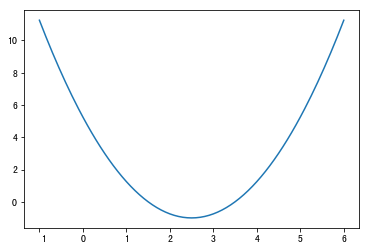

In [6]:
#模拟梯度下降法思想
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-1.,6.,141)
y=(x-2.5)**2-1.
plt.plot(x,y)


In [7]:
#定义J计算规则
epsilon = 1e-8
eta = 0.1

def J(theta):
    return (theta-2.5)**2-1
#定义J的导数规则
def dJ(theta):
    return (theta-2.5)*2
theta=0.0
while True:
    gradient=dJ(theta)  #导数,梯度
    last_theta=theta
    theta=theta-eta*gradient  #新计算的theta
    if(abs(J(theta)-J(last_theta))<epsilon):     #两次之差小于epsilon
        break
print(theta)
print(J(theta))

2.499891109642585
-0.99999998814289


In [32]:
#封装函数

theta_history=[]
def Gradient_Descent(initial_theta,eta,n_interp=1e4,epsilon=1e-8):  #初始值，下降比例，差值
    theta=initial_theta
    i_interp=0
    theta_history.append(initial_theta)
    while i_interp<n_interp:
        gradient=dJ(theta)
        last_theta=theta
        theta=theta-eta*gradient
        theta_history.append(theta)
        if(abs(J(theta)-J(last_theta))<epsilon):   
            break
        i_interp+=1
            
def Plot_theta_history():
    plt.plot(x,J(x))
    plt.plot(np.array(theta_history),J(np.array(theta_history)),color='r',marker='*')
    plt.show()

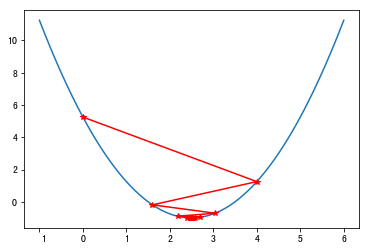

In [33]:

eta=0.8
theta_history=[]
Gradient_Descent(0,eta)
Plot_theta_history()


In [1]:
#04在线性回归中使用梯度下降法
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)
X=x.reshape(-1,1)


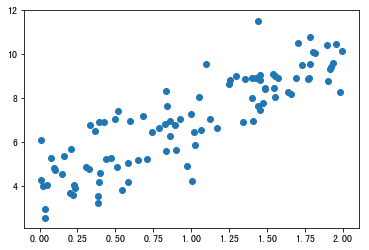

In [2]:
plt.scatter(x,y)


In [41]:
from LinearRegression_1 import LinearRegression

gd_reg=LinearRegression()
gd_reg.fit_GD(X,y)


/Users/jacquelin/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/Users/jacquelin/慕课网刘宇波老师机器学习入门/三、梯度下降法（Gradient Descent）/LinearRegression_1.py:36: RuntimeWarning: overflow encountered in square
  return float('inf')
/Users/jacquelin/慕课网刘宇波老师机器学习入门/三、梯度下降法（Gradient Descent）/LinearRegression_1.py:55: RuntimeWarning: invalid value encountered in double_scalars
  return theta
/Users/jacquelin/慕课网刘宇波老师机器学习入门/三、梯度下降法（Gradient Descent）/LinearRegression_1.py:45: RuntimeWarning: overflow encountered in multiply
  


LinearRegression()

In [44]:
gd_reg.coef_
# 与原来的回归系数3相近

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [6]:
gd_reg.intercept_
#与原来的截距4相近

4.021457858204859

In [8]:

#梯度下降法的向量化、数据归一化

import numpy as np
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=666)



In [23]:
#数据归一化
from sklearn.preprocessing import StandardScaler
standardScaler=StandardScaler()
standardScaler.fit(X_train)
X_train_standard=standardScaler.transform(X_train)
sta_reg=LinearRegression()
sta_reg.fit_GD(X_train_standard,y_train)
X_test_standard=standardScaler.transform(X_test)
sta_reg.score(X_test_standard,y_test)


0.8129880620122235

In [34]:
#梯度下降法优势：高维，特征多
m=1000
n=5000 #5k个特征

big_X=np.random.normal(size=(m,n))
theta=np.random.uniform(0.0,100.0,size=n+1)
big_y=big_X.dot(theta[1:])+theta[0]+np.random.normal(0.,10.,size=m)


In [32]:
#正规
reg1=LinearRegression()
%time reg1.fit_normal(big_X,big_y)


CPU times: user 11.8 s, sys: 428 ms, total: 12.3 s
Wall time: 3.02 s


LinearRegression()

In [45]:
#梯度下降法
from LinearRegression_1 import LinearRegression
reg2=LinearRegression()
#%time reg2.fit_GD(big_X,big_y)



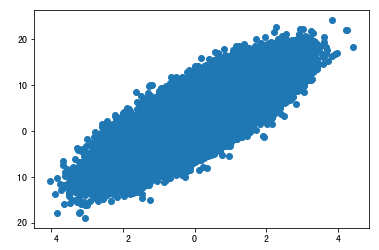

In [48]:
#06随机梯度下降法：只计算部分个m，一部分数据参与，以准确率换时间

m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1,1)
y = 4.*x + 3. + np.random.normal(0, 3, size=m)
plt.scatter(x, y)

In [53]:
#正规算法

def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
    except:
        return float('inf')
    
def dJ(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break

        cur_iter += 1

    return theta



In [54]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)


CPU times: user 2.36 s, sys: 15.4 ms, total: 2.37 s
Wall time: 600 ms


In [51]:
theta

array([2.99272961, 3.99671205])

In [65]:
#随机梯度下降法
def dJ_sdg(theta,X_b_i,y_i):        #stochastic随机地,i不取遍m
    return 2*X_b_i.T.dot(X_b_i.dot(theta)-y_i)
def sgd(X_b,y,initial_theta,n_iters):
    t0,t1=5,50
    def learning_rate(t):
        return t0/(t+t1)
    theta=initial_theta
    for cur_iter in range(n_iters):
        rand_i=np.random.randint(len(X_b))    #随机取一个小于样本个数的数
        gradient=dJ_sdg(theta,X_b[rand_i],y[rand_i])
        theta=theta-learning_rate(cur_iter)*gradient
    return theta

In [66]:
%%time 
X_b=np.hstack([np.ones((len(X),1)),X])
initial_theta=np.empty(X_b.shape[1])
theta=sgd(X_b,y,initial_theta,n_iters=m//3)     #两个除号取整

CPU times: user 220 ms, sys: 2.69 ms, total: 223 ms
Wall time: 222 ms


In [67]:
theta     #虽然准确度差一些，但速度提高了

array([2.97654787, 3.99847924])

In [70]:
#07sklearn包的随机梯度下降法
from sklearn.linear_model.stochastic_gradient import SGDRegressor   #从linear_model导入，只能用于线性
sgd_reg=SGDRegressor()
sgd_reg.fit(X_train_standard,y_train)
sgd_reg.score(X_test_standard,y_test)


/Users/jacquelin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.800054570609163

In [73]:
sgd_reg=SGDRegressor(n_iter=100)
sgd_reg.fit(X_train_standard,y_train)
sgd_reg.score(X_test_standard,y_test)

/Users/jacquelin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.813461610416504

In [74]:
#计算调试debug，在进行回归之前可以先用小批量数据得到一个正确结果，方便后面验证
np.random.seed(666)
X = np.random.random(size=(1000, 10))

true_theta = np.arange(1, 12, dtype=float)
X_b = np.hstack([np.ones((len(X), 1)), X])
y = X_b.dot(true_theta) + np.random.normal(size=1000)

In [75]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')
def dJ_math(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)


In [83]:
def dJ_debug(theta,X_b,y,epsilon=0.01):
    res=np.empty(len(theta))
    for i in range(len(theta)):
        theta_1=theta.copy()
        theta_1[i]+=epsilon
        theta_2=theta.copy()
        theta_2[i]-=epsilon
        res[i]=(J(theta_1,X_b,y)-J(theta_2,X_b,y))/(2*epsilon)
    return res

In [84]:
def gradient_descent(dJ, X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    
    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        cur_iter += 1

    return theta

In [85]:
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

%time theta = gradient_descent(dJ_debug, X_b, y, initial_theta, eta)
theta

CPU times: user 2.89 s, sys: 8.05 ms, total: 2.9 s
Wall time: 2.9 s


array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])

In [86]:
%time theta = gradient_descent(dJ_math, X_b, y, initial_theta, eta)
theta

CPU times: user 1.75 s, sys: 13.3 ms, total: 1.77 s
Wall time: 448 ms


array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])